## Importing the Dependencies

Imports necessary libraries such as numpy, pandas, seaborn, etc. for data manipulation, visualization, statistical analysis, and machine learning.

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the Data and understanding the dataset

In [90]:
data= pd.read_csv("weather_data.csv")
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [91]:
data.shape

(1461, 6)

There are **6 columns** with a total of **1461 rows** according to the observations in the dataset

In [92]:
data.isna().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

There are no Null values in the dataset

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


There are **6 variables** corresponding to 6 columns in the dataset:
    
- 4 variables indicating weather conditions including: precipitation, temp_max, temp_min, wind
- 1 variable to record date information: date has the form YYYY-MM-DD
- 1 variable indicating weather condition: weather

* The variable **precipitation** indicates the precipitation information of all forms of water falling to the ground such as rain, hail, snowfall or drizzle.
* The **temp_max** variable indicates the highest temperature of the day.
* The **temp_min** variable indicates the lowest temperature of the day.
* The **wind** variable stores wind speed information for the day.
* The **weather** defines the weather of the day

## Visualize the data

<Axes: xlabel='weather', ylabel='count'>

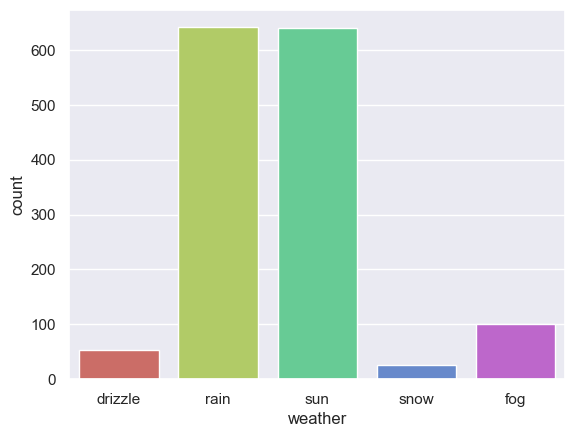

In [94]:
sns.countplot(x='weather', data=data , palette='hls')

In [95]:
weather_counts = data['weather'].value_counts()
weather_counts

weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64

In [96]:
for weather , count in weather_counts.items():
    per = (count/len(data)) * 100
    print(f"{weather.capitalize()} : {per:.2f}%")

Rain : 43.87%
Sun : 43.81%
Fog : 6.91%
Drizzle : 3.63%
Snow : 1.78%


- From the above graph and analysis, we can see that our dataset contains mostly rain and sun weather conditions with more than 600 data lines and is approximately the same when accounting for 43.3% of the set. data.
- For weather conditions such as snow, fog and drizzle there are less than 100 data lines when less than 10% of the dataset.
- Since there is little data about snow, fog and drizzle, this can affect the accuracy of the model when predicting snow, fog and drizzle weather conditions. when too little data to train.

In [97]:
data.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

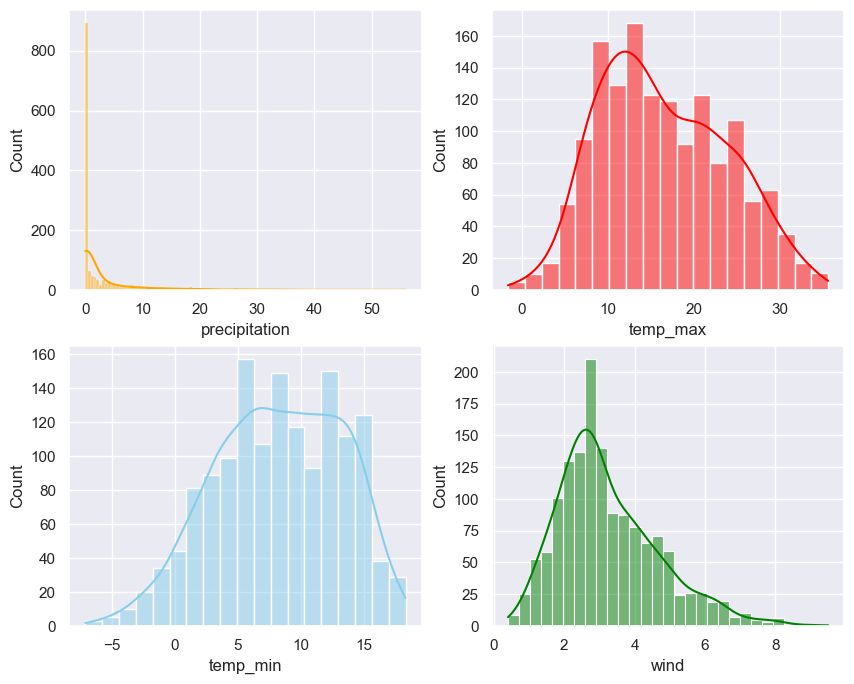

In [98]:
sns.set(style="darkgrid")

variables = data.iloc[:,1:5]
colors = ["orange", "red", "skyblue", "green"]

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
for i, var in enumerate(variables):
    sns.histplot(data=data, x=var, kde=True, ax=axs[i//2, i%2], color=colors[i])

- From the above graphs , it is clear that the distribution of precipitation , wind and max_temp has **positively skewed**. The right tail is longer than the left tail.
- The distribution of temp_min has **negative skewness (left skewed)**.

## Data Cleaning and Processsing

First, we convert the data type in the variable **date** from string to Datetime. Then remove the day and year attributes in date, extract and keep the month attribute because usually the weather often depends on the seasons of the year and the seasons of the year also change by month.

In [99]:
data['date'] = pd.to_datetime(data['date'])
data['date'] = data['date'].dt.month
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,1,0.0,12.8,5.0,4.7,drizzle
1,1,10.9,10.6,2.8,4.5,rain
2,1,0.8,11.7,7.2,2.3,rain
3,1,20.3,12.2,5.6,4.7,rain
4,1,1.3,8.9,2.8,6.1,rain


Rename the name of the feature 'date' to 'month'

In [100]:
data.rename(columns={'date': 'month'},inplace=True)
data.head()

,month,precipitation,temp_max,temp_min,wind,weather
0,1,0.0,12.8,5.0,4.7,drizzle
1,1,10.9,10.6,2.8,4.5,rain
2,1,0.8,11.7,7.2,2.3,rain
3,1,20.3,12.2,5.6,4.7,rain
4,1,1.3,8.9,2.8,6.1,rain


Encoding the target values **weather** into numerical values ranging from 0 to 4 as a new attribute **weather_encoded** and drop then drop weather from the dataset

In [101]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['weather_encoded'] = labelencoder.fit_transform(data['weather'])
data.drop('weather',axis=1,inplace=True)
data.head()

,month,precipitation,temp_max,temp_min,wind,weather_encoded
0,1,0.0,12.8,5.0,4.7,0
1,1,10.9,10.6,2.8,4.5,2
2,1,0.8,11.7,7.2,2.3,2
3,1,20.3,12.2,5.6,4.7,2
4,1,1.3,8.9,2.8,6.1,2


In [102]:
print(labelencoder.classes_)

['drizzle' 'fog' 'rain' 'snow' 'sun']


Create the dictionary mapping that stores the weather value as key and its corresponsing encoded number as value. 

In [103]:
mapping = dict(zip(labelencoder.classes_, labelencoder.transform(labelencoder.classes_)))
print("Mapping of weather to encoded values:")
print(mapping)

Mapping of weather to encoded values:
{'drizzle': 0, 'fog': 1, 'rain': 2, 'snow': 3, 'sun': 4}


Create another dictionary that stores the reverse of the mapped key-value pairs

In [104]:
map = {v: k for k, v in mapping.items()}
print(map)

{0: 'drizzle', 1: 'fog', 2: 'rain', 3: 'snow', 4: 'sun'}


Seperating the feature variables and target varibale into x and y dataframes

In [105]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [106]:
print(x)

      month  precipitation  temp_max  temp_min  wind
0         1            0.0      12.8       5.0   4.7
1         1           10.9      10.6       2.8   4.5
2         1            0.8      11.7       7.2   2.3
3         1           20.3      12.2       5.6   4.7
4         1            1.3       8.9       2.8   6.1
...     ...            ...       ...       ...   ...
1456     12            8.6       4.4       1.7   2.9
1457     12            1.5       5.0       1.7   1.3
1458     12            0.0       7.2       0.6   2.6
1459     12            0.0       5.6      -1.0   3.4
1460     12            0.0       5.6      -2.1   3.5

[1461 rows x 5 columns]


In [107]:
print(y)

0       0
1       2
2       2
3       2
4       2
       ..
1456    2
1457    2
1458    1
1459    4
1460    4
Name: weather_encoded, Length: 1461, dtype: int32


In [108]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score , precision_score, recall_score , f1_score

In [109]:
X_train , X_test , y_train ,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [110]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive-Bayes Classifier": GaussianNB(),
    "KNN Classifier": KNeighborsClassifier(),
}

In [111]:
accuracy=[]
for i in range(len(list(models))):
    model = list(models.values())[i]
    
    #training the model
    model.fit(X_train , y_train)
    
    #predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    #model performance on training data
    train_acc= accuracy_score(y_train , y_train_pred)
    train_f1_score = f1_score(y_train , y_train_pred , average='weighted')
    train_precision = precision_score(y_train , y_train_pred,average='weighted')
    train_recall = recall_score(y_train , y_train_pred, average='weighted')
    
    #model performance on testing data
    test_acc= accuracy_score(y_test , y_test_pred)
    test_f1_score = f1_score(y_test , y_test_pred , average='weighted')
    test_precision = precision_score(y_test , y_test_pred ,average='weighted')
    test_recall = recall_score(y_test , y_test_pred,average='weighted')

    accuracy.append(test_acc)
    
    print(list(models.keys())[i])
    
    print("Model Performance for Training set")
    print("- Accuracy : {:.6f}".format(train_acc))
    print("- F1 score : {:.6f}".format(train_f1_score))
    print("- Precision : {:.6f}".format(train_precision))
    print("- Recall : {:.6f}".format(train_recall))
    
    print("-------------------------------------------")
    
    print("Model Performance for Testing set")
    print("- Accuracy : {:.6f}".format(test_acc))
    print("- F1 score : {:.6f}".format(test_f1_score))
    print("- Precision : {:.6f}".format(test_precision))
    print("- Recall : {:.6f}".format(test_recall))
    
    
    print("\n===========================================\n")


Random Forest
Model Performance for Training set
- Accuracy : 1.000000
- F1 score : 1.000000
- Precision : 1.000000
- Recall : 1.000000
-------------------------------------------
Model Performance for Testing set
- Accuracy : 0.802048
- F1 score : 0.771596
- Precision : 0.782119
- Recall : 0.802048


Decision Tree
Model Performance for Training set
- Accuracy : 1.000000
- F1 score : 1.000000
- Precision : 1.000000
- Recall : 1.000000
-------------------------------------------
Model Performance for Testing set
- Accuracy : 0.723549
- F1 score : 0.724878
- Precision : 0.728324
- Recall : 0.723549


Naive-Bayes Classifier
Model Performance for Training set
- Accuracy : 0.852740
- F1 score : 0.819117
- Precision : 0.814518
- Recall : 0.852740
-------------------------------------------
Model Performance for Testing set
- Accuracy : 0.822526
- F1 score : 0.773467
- Precision : 0.771937
- Recall : 0.822526


KNN Classifier
Model Performance for Training set
- Accuracy : 0.820205
- F1 score

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [112]:
model=list(models.keys())
for i in range(4):
    print(model[i],": ",accuracy[i])

Random Forest :  0.8020477815699659
Decision Tree :  0.7235494880546075
Naive-Bayes Classifier :  0.8225255972696246
KNN Classifier :  0.726962457337884


## Model reliability comparision chart

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


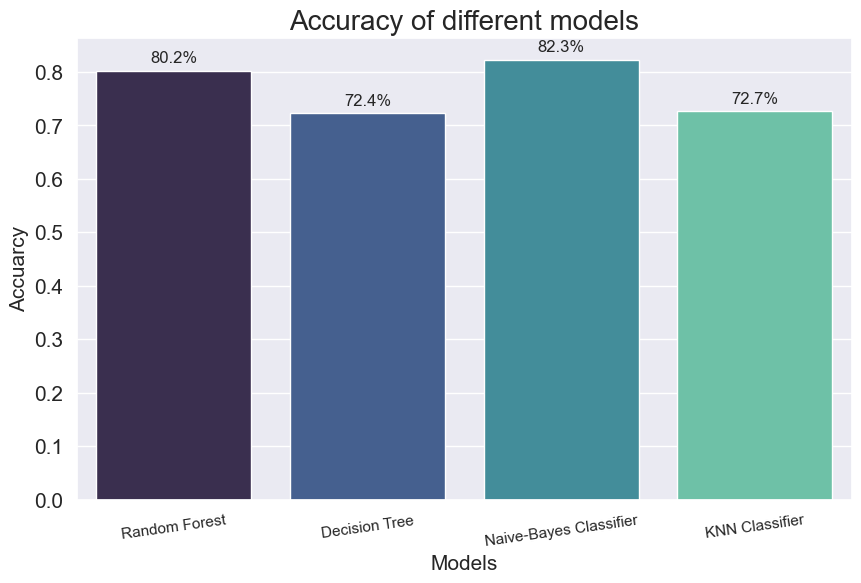

In [113]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,6))
ax = sns.barplot(x = model, y = accuracy, palette="mako")
plt.xlabel("Models",fontsize=15)
plt.ylabel("Accuarcy",fontsize=15)
plt.title("Accuracy of different models", fontsize=20)
plt.xticks(fontsize=11, horizontalalignment="center", rotation=8)
plt.yticks(fontsize=15)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1%}', (p.get_x() + p.get_width()/2, p.get_height()*1.02), ha='center', fontsize='medium')


plt.show()

The accuracy of the model build using Naive Bayes Classifier is better than the remaining models.

In [114]:
nbc = GaussianNB()

Training the Naive Bayes Classifier using the training data set

In [115]:
model = nbc.fit(X_train , y_train)

In [116]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [117]:
print("Accuracy on train data : ",accuracy_score(y_train,y_train_pred))
print("Accuracy on test data : ",accuracy_score(y_test_pred,y_test))

Accuracy on train data :  0.8527397260273972
Accuracy on test data :  0.8225255972696246


## Predictive System

The predictive system takes month, precipitation, maximum temperature, minimum temperature and wind values to give the weather of that particular time  

In [118]:
def weatherPred(month , precp , max_temp , min_temp , wind):
    features = np.array([[month ,precp, max_temp , min_temp , wind]])
    predicted_weather = nbc.predict(features).reshape(1,-1)
    return predicted_weather[0]
    

In [119]:
predict = weatherPred(1,1.3,8.9,2.8,6.1)

print("The Weather is : {}".format(map[predict[0]].capitalize()))

The Weather is : Rain


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [120]:
for i in (range(len(y_test))):
    print("----------------------------------")
    pred = nbc.predict(X_test.iloc[i].values.reshape(1,-1))
    print("Predicted Weather is {}".format(map[pred[0]].capitalize()))
    print("Actual Weather is {}".format(map[y_test.iloc[i]].capitalize()))

----------------------------------
Predicted Weather is Sun
Actual Weather is Sun
----------------------------------
Predicted Weather is Sun
Actual Weather is Sun
----------------------------------
Predicted Weather is Rain
Actual Weather is Rain
----------------------------------
Predicted Weather is Sun
Actual Weather is Sun
----------------------------------
Predicted Weather is Sun
Actual Weather is Sun
----------------------------------
Predicted Weather is Rain
Actual Weather is Rain
----------------------------------
Predicted Weather is Rain
Actual Weather is Rain
----------------------------------
Predicted Weather is Rain
Actual Weather is Rain
----------------------------------
Predicted Weather is Sun
Actual Weather is Fog
----------------------------------
Predicted Weather is Rain
Actual Weather is Rain
----------------------------------
Predicted Weather is Sun
Actual Weather is Sun
----------------------------------
Predicted Weather is Rain
Actual Weather is Rain
----

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but Ga

In [121]:
import pickle
with open('weather.pkl','wb') as f:
    pickle.dump(nbc,f)


In [122]:
nbc_model = pickle.load(open('weather.pkl','rb'))


pkl_predict = nbc_model.predict([[1,1.3,8.9,2.8,6.1]])
print("The Weather is : {}".format(map[pkl_predict[0]].capitalize()))

The Weather is : Rain


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
